In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:

# Define the environment
grid = np.array([
    ['W', '0', 'X', '0', '0'],
    ['0', '0', 'X', '0', '0'],
    ['0', '0', '0', '0', '0'],
    ['X', '0', 'X', 'X', '0'],
    ['0', '0', '0', '0', 'D']
])

In [11]:
# Reward structure
rewards = np.full((5, 5), -1)  # Default penalty for moving
restricted_cells = [(0, 2), (1, 2), (3, 0), (3, 2), (3, 3)]  # Restricted airspace
for cell in restricted_cells:
    rewards[cell] = -10
rewards[4, 4] = 100  # Reward for reaching the goal

In [12]:
# Q-table
q_table = np.zeros((25, 4))  # 25 states, 4 actions

# Actions: 0=Up, 1=Down, 2=Left, 3=Right
actions = [0, 1, 2, 3]

# Learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.2  # Exploration rate
episodes = 1000

In [13]:
# Helper functions
def state_to_coordinates(state):
    return divmod(state, 5)

def coordinates_to_state(row, col):
    return row * 5 + col

def step(state, action):
    row, col = state_to_coordinates(state)
    if action == 0:  # Up
        row = max(0, row - 1)
    elif action == 1:  # Down
        row = min(4, row + 1)
    elif action == 2:  # Left
        col = max(0, col - 1)
    elif action == 3:  # Right
        col = min(4, col + 1)
    next_state = coordinates_to_state(row, col)
    return next_state, rewards[row, col]

In [14]:

# Q-Learning algorithm
for episode in range(episodes):
    state = 0  # Start at (0, 0)
    done = False

    while not done:
        # Choose action using ε-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)  # Exploration
        else:
            action = np.argmax(q_table[state])  # Exploitation

        # Take action and observe the next state and reward
        next_state, reward = step(state, action)

        # Update Q-value
        q_table[state, action] = q_table[state, action] + alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )

        # Transition to the next state
        state = next_state

        # Check if goal is reached
        if state == 24 or reward == -10:  # Delivery point or restricted area
            done = True



C:\Users\Admin\AppData\Local\Temp\ipykernel_6988\3570254627.py:27: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, 4 - i), 1, 1, color=color, edgecolor='black'))


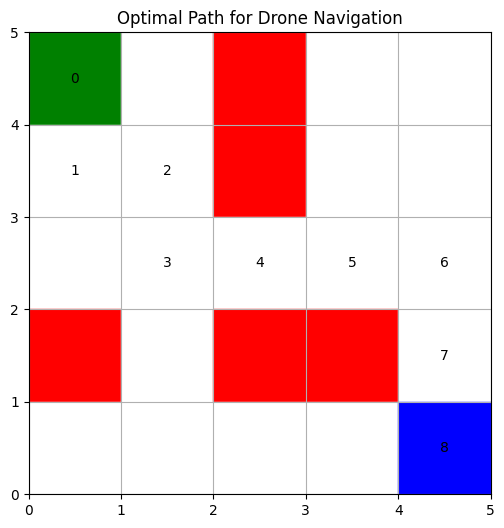

In [15]:
# Visualize the optimal path
def find_optimal_path(q_table):
    path = []
    state = 0  # Start at (0, 0)

    while state != 24:  # Until reaching the delivery point (D)
        path.append(state_to_coordinates(state))
        action = np.argmax(q_table[state])  # Best action
        state, _ = step(state, action)

    path.append((4, 4))  # Add the delivery point
    return path

path = find_optimal_path(q_table)

# Plot the grid and path
fig, ax = plt.subplots(figsize=(6, 6))
for i in range(5):
    for j in range(5):
        color = 'white'
        if grid[i, j] == 'W':
            color = 'green'  # Start
        elif grid[i, j] == 'D':
            color = 'blue'  # Goal
        elif grid[i, j] == 'X':
            color = 'red'  # Restricted airspace
        ax.add_patch(plt.Rectangle((j, 4 - i), 1, 1, color=color, edgecolor='black'))

# Annotate the path
for step, (i, j) in enumerate(path):
    plt.text(j + 0.5, 4 - i + 0.5, str(step), ha='center', va='center', color='black')

# Adjust plot
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
plt.grid(True)
plt.title("Optimal Path for Drone Navigation")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
